In [3]:
import numpy as np
import cv2 as cv
from scipy import signal
import matplotlib.pyplot as plt
plt.style.use("grayscale")

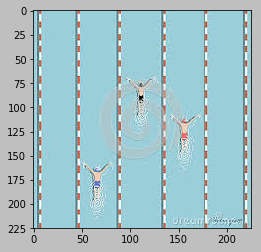

In [6]:
image_path = 'im1.jpg'

# load image to 2d array
tmp_img = np.array(cv.imread(image_path))
# switch channels to make RGB
img = np.zeros(tmp_img.shape)
img[:,:,0] = tmp_img[:,:,2]
img[:,:,2] = tmp_img[:,:,0]
img[:,:,1] = tmp_img[:,:,1]
# make it 0<=>1 insted of 0<=>255: brightest = 1, darkest = 0
img = img / 255

im_hight = img.shape[0]
im_width = img.shape[1]
# show image
plt.imshow(img)

## correlation

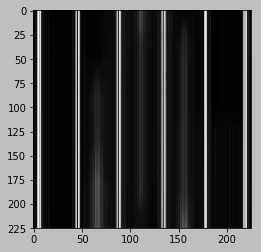

In [7]:
# get red channel
im_red = img[:,:,0]
# normelize channel: mean=avarange
im_red_norm = np.abs(im_red - im_red.mean())
# correlation
template = np.ones((im_red_norm.shape[1],1))
cor_im = signal.correlate2d(im_red_norm, template, boundary='symm', mode='same')
plt.imshow(cor_im);

## find line locations

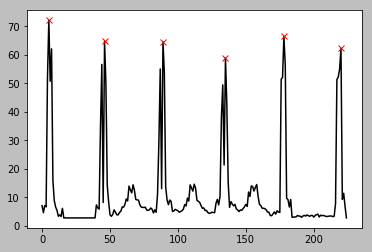

In [8]:
# middle hight of the picture
cor_middle = cor_im[im_hight//2,:]
# make graph
plt.plot(cor_middle)
#  find maximum peaks: distance between peaks
line_locs, _ = signal.find_peaks(cor_middle, distance=35) #, threshold=None, prominence=None, width=None, wlen=None, rel_height=0.5, plateau_size=None)
# show red 'x' in maximums
plt.plot(line_locs, cor_middle[line_locs], "rx")

## sweemers width locs

In [9]:
sweemers_width = []
for i in range(1,len(line_locs)):
    loc = (line_locs[i]+line_locs[i-1])/2
    sweemers_width.append(int(np.round(loc)))
print(sweemers_width)

[26, 68, 112, 156, 199]


## sweemers hight locs

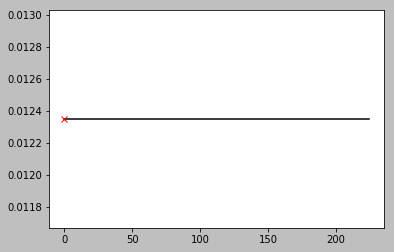

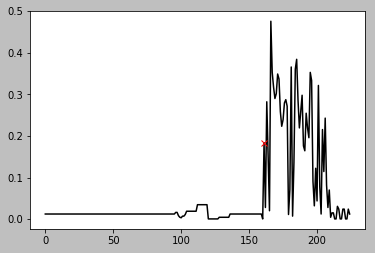

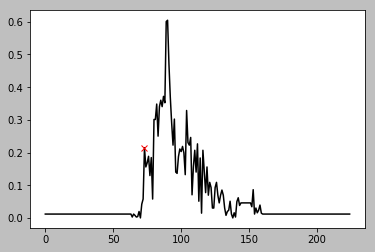

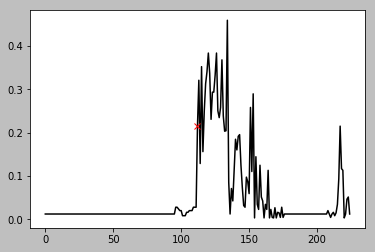

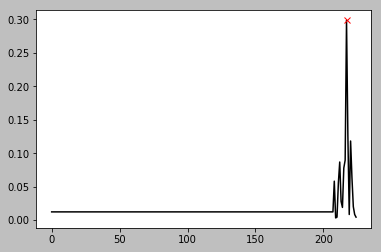

In [10]:
# set sweemers hight array
sweemers_hight = np.zeros(len(sweemers_width),np.integer)
# loop sweemers each at any 'i'
for i in range(len(sweemers_width)):
#     get sweemer line from image
    sweemer_line = im_red_norm[:,sweemers_width[i]]
#     loop points in the line: where the sweemer start?
    for j in range(len(sweemer_line)):
#         check minimum value of the sweemer
        if sweemer_line[j] > 0.1:
            sweemers_hight[i] = j
            break
#   just show graphs
    plt.plot(sweemer_line)
    plt.plot(sweemers_hight[i],sweemer_line[sweemers_hight[i]],"rx")
    plt.show()

## plot result on picture

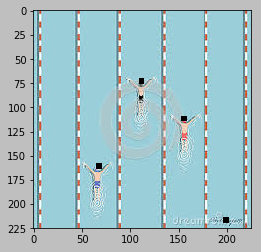

In [12]:
box_size = 6
im_result = img
for i in range(len(sweemers_width)):
    im_result[sweemers_hight[i]-box_size//2:sweemers_hight[i]+box_size//2, sweemers_width[i]-box_size//2:sweemers_width[i]+box_size//2,:] = 0
plt.imshow(im_result)